## 딥러닝응용 1주차 과제

In [146]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [147]:
# Load Data
df = pd.read_csv('abalone.csv')
df.head()

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


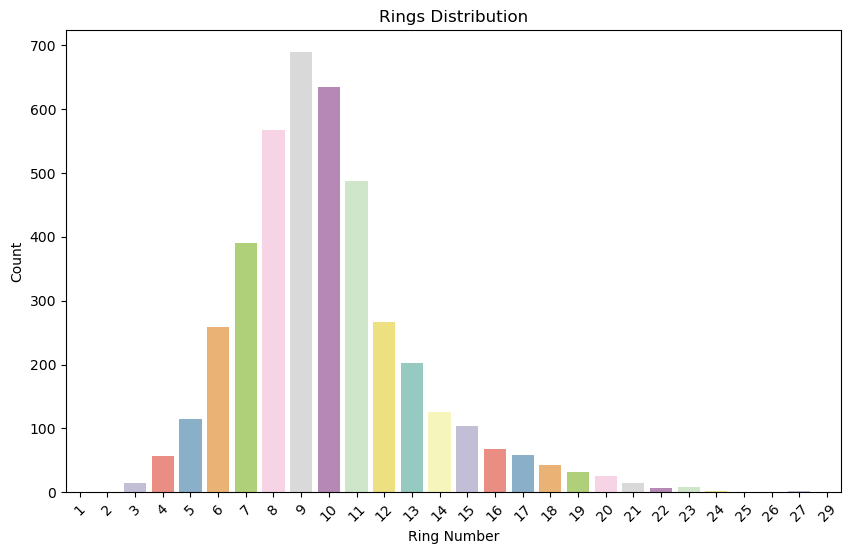

In [148]:
# Visualize Rings
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Rings', hue='Rings', palette='Set3', legend=False)
plt.title('Rings Distribution')
plt.xlabel('Ring Number')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [149]:
# Data Preproccesing
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df = df.drop(['id'], axis=1)
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [150]:
df.shape

(4177, 9)

In [151]:
# Create Target
x = df.drop(['Rings'], axis=1)
y = df['Rings']

In [152]:
# Train-Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

#### ML Classification

In [153]:
from sklearn.metrics import confusion_matrix, classification_report

# RF Train
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)

# RF Test
y_pred = model.predict(x_test)
print("RF Classification Report")
print(classification_report(y_test, y_pred, zero_division=0))

RF Classification Report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.17      0.20      0.18        10
           5       0.16      0.16      0.16        25
           6       0.42      0.40      0.41        63
           7       0.25      0.38      0.30        74
           8       0.28      0.28      0.28       112
           9       0.26      0.31      0.28       136
          10       0.22      0.33      0.26       120
          11       0.24      0.20      0.22        93
          12       0.15      0.09      0.11        45
          13       0.17      0.13      0.14        47
          14       0.18      0.06      0.10        31
          15       0.00      0.00      0.00        15
          16       0.12      0.06      0.08        17
          17       0.00      0.00      0.00        16
          18       0.00      0.00      0.00        14
          19       0.00      0.00      0.00         7
  

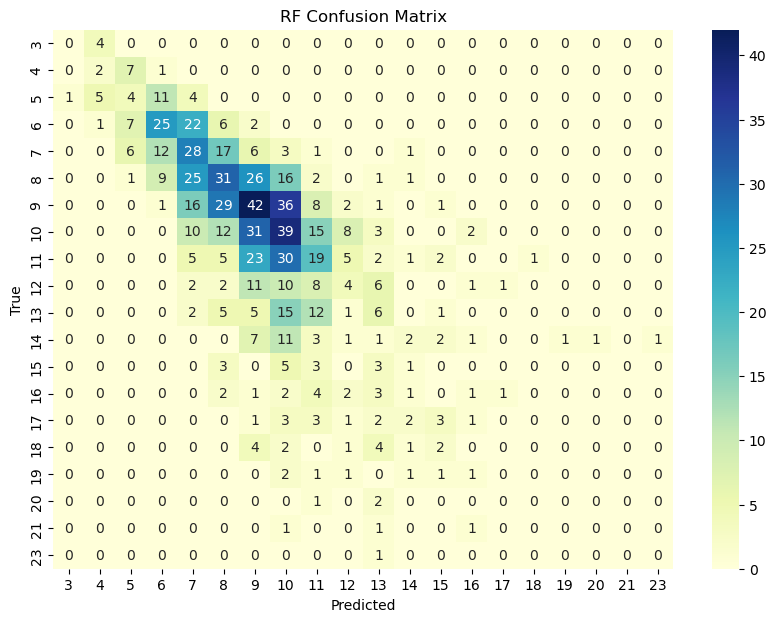

In [154]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Determine unique class labels
unique_labels = sorted(set(y_test) | set(y_pred))

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('RF Confusion Matrix')
plt.show()

#### ML Regression

In [155]:
# LR Train
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

# LR Test
from sklearn.metrics import mean_squared_error
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 5.31252398694271


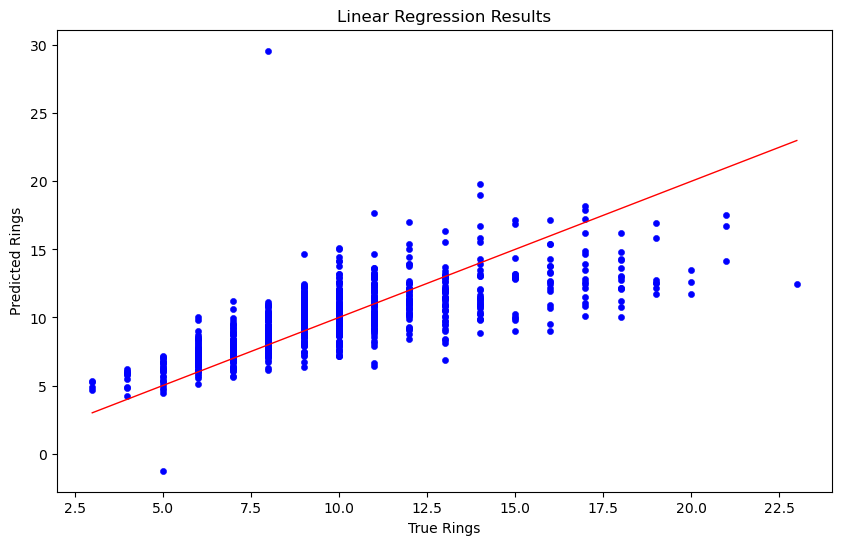

In [156]:
# Visualize Results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', edgecolor=None, s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=1) 
plt.xlabel('True Rings')
plt.ylabel('Predicted Rings')
plt.title('Linear Regression Results')
plt.show()


#### DL Classification

In [157]:
# Import Libraries
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset

device = "cuda" if torch.cuda.is_available() else "cpu"

# Convert to PyTorch Tensors
x_train_tensor = torch.tensor(x_train.values, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Dataset and DataLoader
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [158]:
# NeuralNetwork Class 
class NeuralNetwork(nn.Module):
    def __init__(self, n_input, n_output, n_hidden):
        super(NeuralNetwork, self).__init__()
        self.l1 = nn.Linear(n_input, n_hidden)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(n_hidden, n_hidden)
        self.l3 = nn.Linear(n_hidden, n_output)


    def forward(self, x):
        x = self.l1(x)
        x = self.relu(x)
        x = self.l2(x)
        x = self.relu(x)
        x = self.l3(x)
        return x

# Hyperparameters
n_input = x_train.shape[1]   
n_output = y_train.shape[0]                
n_hidden = 64                

# Functions
model = NeuralNetwork(n_input, n_output, n_hidden).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Train Function
def train(dataloader, model, loss_fn, optimizer):
    model.train() 
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        pred = model(X)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# Test Function
def test(dataloader, model, loss_fn):
    model.eval()  
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad(): 
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)

            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:.6f} \n")

# Train + Test Loop
epochs = 20
for t in range(epochs):
    print(f"Epoch [{t+1}/{epochs}] ---------------------------")
    train(train_loader, model, loss_fn, optimizer)
    test(test_loader, model, loss_fn)

print("Done!")

Epoch [1/20] ---------------------------
Test Accuracy: 17.6%, Avg loss: 2.482340 

Epoch [2/20] ---------------------------
Test Accuracy: 20.1%, Avg loss: 2.286025 

Epoch [3/20] ---------------------------
Test Accuracy: 19.9%, Avg loss: 2.230366 

Epoch [4/20] ---------------------------
Test Accuracy: 21.3%, Avg loss: 2.187788 

Epoch [5/20] ---------------------------
Test Accuracy: 27.5%, Avg loss: 2.151325 

Epoch [6/20] ---------------------------
Test Accuracy: 26.0%, Avg loss: 2.142334 

Epoch [7/20] ---------------------------
Test Accuracy: 23.7%, Avg loss: 2.125248 

Epoch [8/20] ---------------------------
Test Accuracy: 21.9%, Avg loss: 2.117747 

Epoch [9/20] ---------------------------
Test Accuracy: 23.1%, Avg loss: 2.102682 

Epoch [10/20] ---------------------------
Test Accuracy: 22.7%, Avg loss: 2.088661 

Epoch [11/20] ---------------------------
Test Accuracy: 22.5%, Avg loss: 2.085031 

Epoch [12/20] ---------------------------
Test Accuracy: 25.6%, Avg loss: 

#### DL Regression

In [159]:
# Convert to PyTorch Tensors
x_train_tensor = torch.tensor(x_train.values, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)  
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Dataset and DataLoader
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# NeuralNetwork Class 
class NeuralNetwork(nn.Module):
    def __init__(self, n_input, n_hidden):
        super(NeuralNetwork, self).__init__()
        self.l1 = nn.Linear(n_input, n_hidden)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(n_hidden, 1)  

    def forward(self, x):
        x = self.l1(x)
        x = self.relu(x)
        x = self.l2(x)
        return x

# Hyperparameters
n_input = x_train.shape[1]   
n_hidden = 64                

# Functions
model = NeuralNetwork(n_input, n_hidden).to(device)
loss_fn = nn.MSELoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Train Function
def train(dataloader, model, loss_fn, optimizer):
    model.train() 
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        pred = model(X)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


# Test Function
def test(dataloader, model, loss_fn):
    model.eval()  
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss = 0

    with torch.no_grad():  
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()

    test_loss /= num_batches
    print(f"Avg loss: {test_loss:.6f} \n")

# Train + Test Loop
epochs = 20
for t in range(epochs):
    print(f"Epoch [{t+1}/{epochs}]")
    train(train_loader, model, loss_fn, optimizer)
    test(test_loader, model, loss_fn)
    print("-" * 30)

print("Done!")


Epoch [1/20]
Avg loss: 9.742750 

------------------------------
Epoch [2/20]
Avg loss: 7.921480 

------------------------------
Epoch [3/20]
Avg loss: 7.229736 

------------------------------
Epoch [4/20]
Avg loss: 6.878089 

------------------------------
Epoch [5/20]
Avg loss: 6.644048 

------------------------------
Epoch [6/20]
Avg loss: 6.474165 

------------------------------
Epoch [7/20]
Avg loss: 6.430638 

------------------------------
Epoch [8/20]
Avg loss: 6.241207 

------------------------------
Epoch [9/20]
Avg loss: 6.076150 

------------------------------
Epoch [10/20]
Avg loss: 6.005074 

------------------------------
Epoch [11/20]
Avg loss: 5.806173 

------------------------------
Epoch [12/20]
Avg loss: 5.738577 

------------------------------
Epoch [13/20]
Avg loss: 5.571673 

------------------------------
Epoch [14/20]
Avg loss: 5.582436 

------------------------------
Epoch [15/20]
Avg loss: 5.447064 

------------------------------
Epoch [16/20]
Avg l